In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,f1_score,recall_score,confusion_matrix

# **LOAD Data Set**

In [22]:
data_train = pd.read_csv('emnist-letters-train.csv', header=None)
data_test = pd.read_csv('emnist-letters-test.csv', header=None)

print("Train shape:", data_train.shape)
print("Test shape:", data_test.shape)


Train shape: (88800, 785)
Test shape: (14800, 785)


# **Basic EDA Feature**


In [67]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88800 entries, 0 to 88799
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 531.8 MB


In [69]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14800 entries, 0 to 14799
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 88.6 MB


In [71]:
d = data_train.describe()
d

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,88800.000000,88800.0,88800.0,88800.0,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,...,88800.0,88800.0,88800.0,88800.000000,88800.000000,88800.0,88800.0,88800.0,88800.0,88800.0
mean,13.519268,0.0,0.0,0.0,0.000011,0.003986,0.016757,0.024640,0.021486,0.017140,...,0.0,0.0,0.0,0.003041,0.000360,0.0,0.0,0.0,0.0,0.0
std,7.502931,0.0,0.0,0.0,0.003356,0.544039,1.547686,1.915976,1.803270,1.620194,...,0.0,0.0,0.0,0.823445,0.107385,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,7.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,14.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,20.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,26.000000,0.0,0.0,0.0,1.000000,107.000000,213.000000,217.000000,214.000000,216.000000,...,0.0,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


In [23]:
print(data_train.head())
print("Kolom terakhir:", data_train.columns[-1])

print(data_test.head())
print("Kolom terakhir:", data_test.columns[-1])

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0   23    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2   16    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3   15    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4   23    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]
Kolom terakhir: 784
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    1    0    0    0    0    0

In [24]:
data_merge = pd.concat([data_train, data_test]).reset_index(drop=True)

In [25]:
data_merge = data_merge.iloc[:, :785]

In [61]:
label_col = 0  
samples_per_class = 100

sampled_dfs = []
for class_id in range(1, 27):  # kelas 1 sampai 26
    class_df = data_merge[data_merge[label_col] == class_id]
    if len(class_df) >= samples_per_class:
        sampled_df = class_df.sample(samples_per_class, random_state=42)
        sampled_dfs.append(sampled_df)

balanced_df = pd.concat(sampled_dfs).reset_index(drop=True)
print("Balanced data shape:", balanced_df.shape)


Balanced data shape: (2600, 785)


<Axes: xlabel='0'>

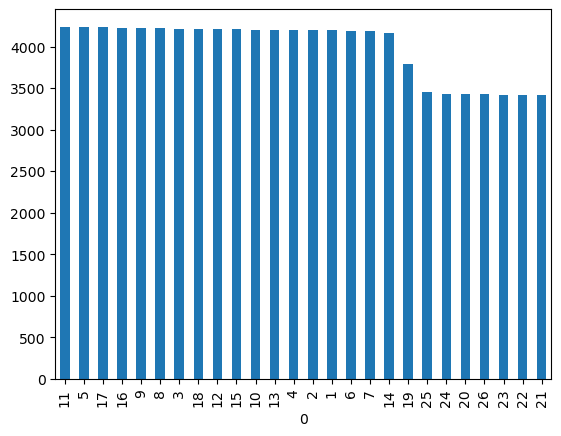

In [63]:
data_merge[0].value_counts().plot(kind='bar')

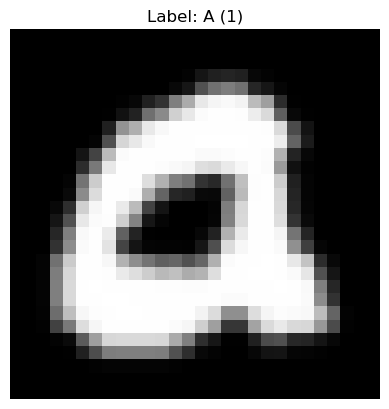

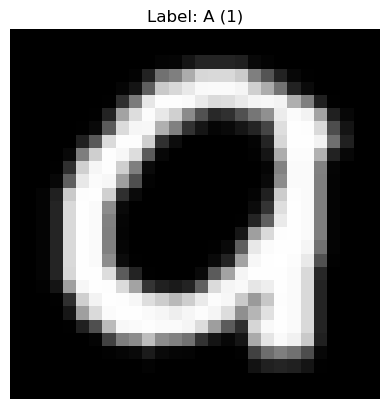

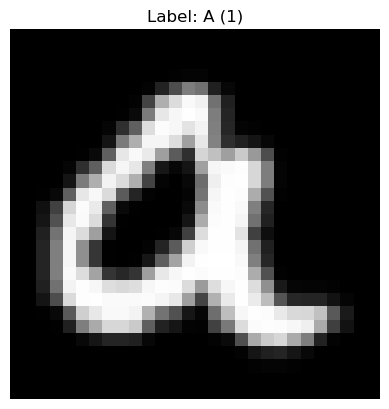

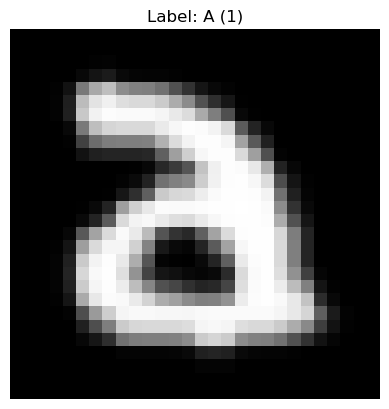

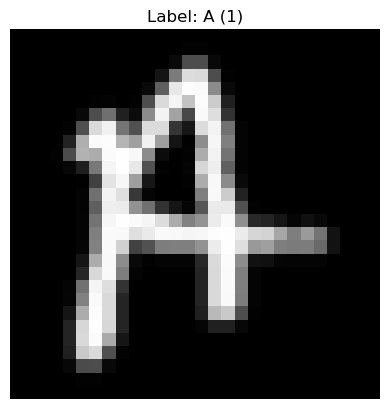

In [27]:
import matplotlib.pyplot as plt

def show_image(row):
    image = row[1:].values.reshape(28, 28).T  # transpose for correct orientation
    label_num = int(row.iloc[0])
    label_char = chr(label_num + 64)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label_char} ({label_num})')
    plt.axis('off')
    plt.show()

# Visualize first 5 images
for i in range(5):
    show_image(balanced_df.iloc[i])

In [28]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(
    balanced_df,
    test_size=0.2,
    stratify=balanced_df.iloc[:, 0],  # stratify by label to keep balanced classes
    random_state=42
)

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)


Train shape: (2080, 785)
Test shape: (520, 785)


#**TRAINING**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [31]:
X = balanced_df.iloc[:, 1:].values
y = balanced_df.iloc[:, 0].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


**HOG**

In [32]:
from skimage.feature import hog
import numpy as np

def extract_hog_dataset(X, orientations=12, pixels_per_cell=(4,4), cells_per_block=(2,2)):
    hog_features = []
    for row in X:
        # reshape ke 28x28
        image = row.reshape(28,28).T
        features = hog(image,
                       orientations=orientations,
                       pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block,
                       block_norm='L2-Hys',
                       transform_sqrt=True)
        hog_features.append(features)
    return np.array(hog_features)


In [33]:
X_train_hog = extract_hog_dataset(X_train)
X_test_hog = extract_hog_dataset(X_test)

In [34]:
print("Shape X_train_hog:", X_train_hog.shape)
print("Shape X_test_hog:", X_test_hog.shape)

Shape X_train_hog: (2080, 1728)
Shape X_test_hog: (520, 1728)


In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

In [37]:
svm = SVC()

In [38]:
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_hog, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [39]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8173076923076923


In [40]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_hog)

In [41]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.80      0.73        20
           2       0.89      0.80      0.84        20
           3       0.86      0.90      0.88        20
           4       0.83      0.95      0.88        20
           5       1.00      0.90      0.95        20
           6       0.85      0.85      0.85        20
           7       0.71      0.60      0.65        20
           8       0.76      0.80      0.78        20
           9       0.50      0.45      0.47        20
          10       1.00      0.85      0.92        20
          11       0.89      0.85      0.87        20
          12       0.50      0.55      0.52        20
          13       0.87      1.00      0.93        20
          14       1.00      0.80      0.89        20
          15       0.91      1.00      0.95        20
          16       0.94      0.80      0.86        20
          17       0.61      0.55      0.58        20
   

In [42]:
y_train_pred = best_model.predict(X_train_hog)
y_test_pred = best_model.predict(X_test_hog)

In [43]:
def print_metrics(y_true, y_pred, dataset_name):
    print(f"--- Performance on {dataset_name} set ---")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-score:  {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

In [44]:
print_metrics(y_train, y_train_pred, "Train")

--- Performance on Train set ---
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        80
           3       1.00      1.00      1.00        80
           4       1.00      1.00      1.00        80
           5       1.00      1.00      1.00        80
           6       1.00      1.00      1.00        80
           7       1.00      1.00      1.00        80
           8       1.00      1.00      1.00        80
           9       1.00      1.00      1.00        80
          10       1.00      1.00      1.00        80
          11       1.00      1.00      1.00        80
          12       1.00      1.00      1.00        80
          13       1.00      1.00      1.00        80
          14       1.00      1.00      1.00        80
          15       1.00      1.00      1.00        80
      

In [45]:
print_metrics(y_test, y_test_pred, "Test")

--- Performance on Test set ---
Accuracy:  0.8192
Precision: 0.8232
Recall:    0.8192
F1-score:  0.8182

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.80      0.73        20
           2       0.89      0.80      0.84        20
           3       0.86      0.90      0.88        20
           4       0.83      0.95      0.88        20
           5       1.00      0.90      0.95        20
           6       0.85      0.85      0.85        20
           7       0.71      0.60      0.65        20
           8       0.76      0.80      0.78        20
           9       0.50      0.45      0.47        20
          10       1.00      0.85      0.92        20
          11       0.89      0.85      0.87        20
          12       0.50      0.55      0.52        20
          13       0.87      1.00      0.93        20
          14       1.00      0.80      0.89        20
          15       0.91      1.00      0.95        20
       